# Спектральный анализ

In [3]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1.5
mpl.rcParams['figure.dpi'] = default_dpi * factor

## Исходные данные

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81
 0.84 0.87 0.9  0.93 0.96 0.99 1.02 1.05 1.08 1.11 1.14 1.17 1.2  1.23
 1.26 1.29 1.32 1.35 1.38 1.41 1.44 1.47 1.5  1.53 1.56 1.59 1.62 1.65
 1.68 1.71 1.74 1.77 1.8  1.83 1.86 1.89 1.92 1.95 1.98 2.01 2.04 2.07
 2.1  2.13 2.16 2.19 2.22 2.25 2.28 2.31 2.34 2.37 2.4  2.43 2.46 2.49
 2.52 2.55 2.58 2.61 2.64 2.67 2.7  2.73 2.76 2.79 2.82 2.85 2.88 2.91
 2.94 2.97 3.  ]


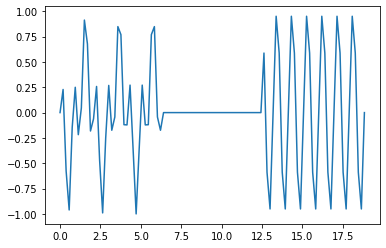

In [16]:
x = np.linspace(0, np.pi * 6, 101)

y = np.cos(6 *x) * np.sin(3 * x) #+ 2.*np.sin(x * 4 ) #+ np.sin(x * 25.5)

y[x>np.pi * 2] = 0.

y[x>np.pi * 4] = 1. * np.sin( 10 * x [x>np.pi * 4]* 4)

print (x/(np.pi * 2))

plt.plot(x, y)

## Прямое и обратное ДПФ

-0.010190989583176834


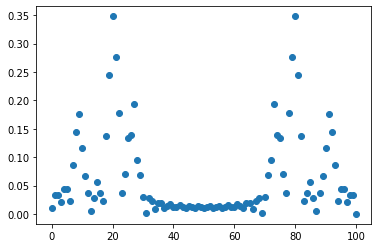

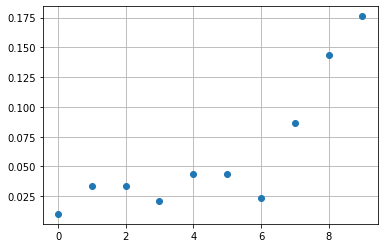

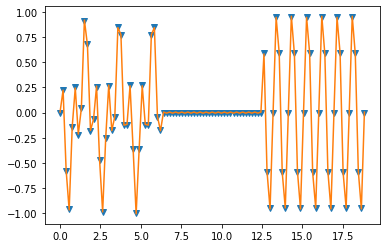

In [17]:
L = max(x) - min(x)
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

n = len(x)

dx = L / (n-1)

# --------------------------------------------------------------------------------------
#                                                                 Прямое преобразование
# --------------------------------------------------------------------------------------

a[0] = 1./L * np.sum (y [:(n-1)]) * dx
b[0] = 0.

print (a[0])

for k in range (1, n-1):
    
    CosTerm = np.cos(2.* np.pi * k * x / L) * dx
    SinTerm =  np.sin(2.* np.pi * k * x / L) * dx
    
    a[k]  = 2./L * np.sum (y[:(n-1)]*CosTerm [:(n-1)])
    b[k]  = 2./L * np.sum (y[:(n-1)]*SinTerm [:(n-1)])
           
    A = (a**2+b**2)**(0.5)
    
    #print (a[k], b[k])
    
#print (A)
#print(A[A>1.E-6])

plt.plot (A[0:n], 'o')
plt.figure ()
plt.grid ()
plt.plot (A[0:10], 'o')

# --------------------------------------------------------------------------------------
#                                                                Обратное преобразование
# --------------------------------------------------------------------------------------

m = int(n/2)

yf = np.zeros (n)

for k in range (0, m):
    
    yf += a[k]*np.cos(2.* np.pi * k * x / L) + b[k]*np.sin(2.* np.pi * k * x / L)
    
plt.figure ()
plt.plot (x,y, 'v')
plt.plot (x,yf)

## Быстрое ДПФ (FFT)

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81
 0.84 0.87 0.9  0.93 0.96 0.99 1.02 1.05 1.08 1.11 1.14 1.17 1.2  1.23
 1.26 1.29 1.32 1.35 1.38 1.41 1.44 1.47 1.5  1.53 1.56 1.59 1.62 1.65
 1.68 1.71 1.74 1.77 1.8  1.83 1.86 1.89 1.92 1.95 1.98 2.01 2.04 2.07
 2.1  2.13 2.16 2.19 2.22 2.25 2.28 2.31 2.34 2.37 2.4  2.43 2.46 2.49
 2.52 2.55 2.58 2.61 2.64 2.67 2.7  2.73 2.76 2.79 2.82 2.85 2.88 2.91
 2.94 2.97 3.  ]


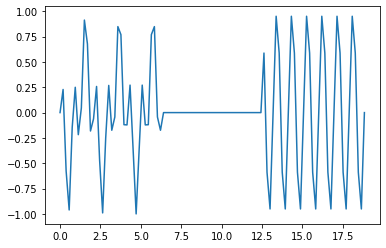

In [18]:
#x = np.linspace(0, np.pi * 2, 100, endpoint=False)
#y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ np.sin(x * 25.5)

print (x/(np.pi * 2))

plt.plot(x, y)

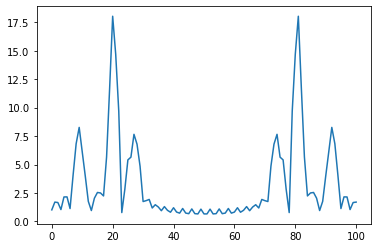

In [19]:
# --------------------------------------------------------------------------------------
#                                                                             Прямое FFT
# --------------------------------------------------------------------------------------

y_fft = fft.fft(y)

plt.plot(np.abs(y_fft))

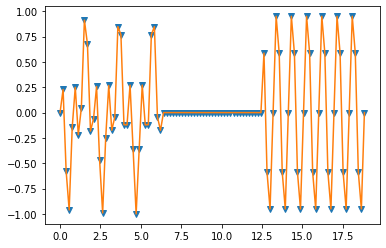

In [20]:
# --------------------------------------------------------------------------------------
#                                                                           Обратное FFT
# --------------------------------------------------------------------------------------
from scipy.fftpack import ifft
yf = ifft(y_fft )
plt.plot (x,y,'v')
plt.plot (x,yf)

## Зашумленные данные

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81
 0.84 0.87 0.9  0.93 0.96 0.99 1.02 1.05 1.08 1.11 1.14 1.17 1.2  1.23
 1.26 1.29 1.32 1.35 1.38 1.41 1.44 1.47 1.5  1.53 1.56 1.59 1.62 1.65
 1.68 1.71 1.74 1.77 1.8  1.83 1.86 1.89 1.92 1.95 1.98 2.01 2.04 2.07
 2.1  2.13 2.16 2.19 2.22 2.25 2.28 2.31 2.34 2.37 2.4  2.43 2.46 2.49
 2.52 2.55 2.58 2.61 2.64 2.67 2.7  2.73 2.76 2.79 2.82 2.85 2.88 2.91
 2.94 2.97 3.  ]


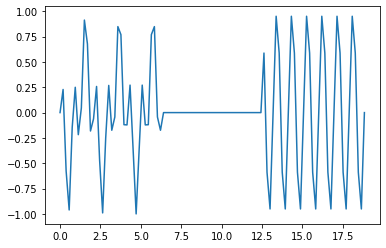

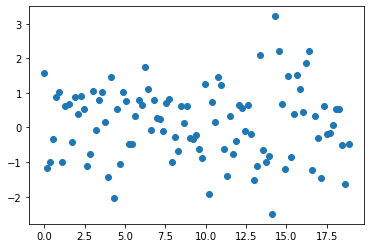

In [21]:
#x = np.linspace(0, np.pi * 4, 101)
#y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ np.sin(x * 25.5)

#x = np.linspace(-10, 10, 101)
#y = 5*np.exp(-10*x**2) * 0.

#y[x>-1.]=1
#y[x>1.]=0

print (x/(np.pi * 2))

yd = np.zeros(len(x))

plt.plot(x, y)
Delta = 1.0 * np.random.randn(len(x))
yd = y + Delta
y_av = np.sum(y)/len(x)

plt.figure ()

plt.plot (x, yd, 'o')

0.1321672587492157


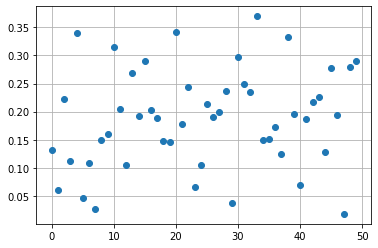

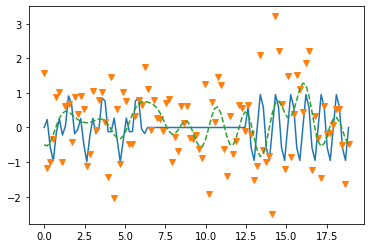

In [22]:
L = max(x) - min(x)
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

n = len(x)

dx = L / (n-1)

# --------------------------------------------------------------------------------------
#                                                                 Прямое преобразование
# --------------------------------------------------------------------------------------

a[0] = 1./L * np.sum (yd [:(n-1)]) * dx
b[0] = 0.

print (a[0])

for k in range (1, n-1):
    
    CosTerm = np.cos(2.* np.pi * k * x / L) * dx
    SinTerm =  np.sin(2.* np.pi * k * x / L) * dx
    
    a[k]  = 2./L * np.sum (yd[:(n-1)]*CosTerm [:(n-1)])
    b[k]  = 2./L * np.sum (yd[:(n-1)]*SinTerm [:(n-1)])
           
    A = (a**2+b**2)**(0.5)
    
    #print (a[k], b[k])
    
#print (A)
#print(A[A>1.E-6])

plt.grid ()
plt.plot (A[0:int(n/2)], 'o')

# --------------------------------------------------------------------------------------
#                                                                Обратное преобразование
# --------------------------------------------------------------------------------------

m = int(n/2)

yf = np.zeros (n)

for k in range (0, int(m/4)):
    
    yf += a[k]*np.cos(2.* np.pi * k * x / L) + b[k]*np.sin(2.* np.pi * k * x / L)
    
plt.figure ()
plt.plot (x, y,)
plt.plot (x, yd, 'v')
plt.plot (x,yf, '--')